In [1]:
# loading all libraries required for this tasks
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

Exploratory data analysis
The first step in any analysis is to first understand the data. Let's take a look
at each of the datasets provided.

Examining transaction data

In [2]:
## Loading the  required  datasets and assigning a variable name
# WHERE TD = TRANSACTIONAL DATA  , CD = CUSTOMER DATA
from google.colab import files
uploaded = files.upload()

Saving dataset_tk.csv to dataset_tk (1).csv
Saving long_data_.csv to long_data_ (1).csv


In [3]:
data = pd.read_csv("dataset_tk.csv")
data.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,319.5,253.0,428.6,12.8,18.6,164.6,204.2,206.3,72.7,268.3,6.3,82.3,24.8,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,316.7,253.6,419.6,13.7,18.2,170.1,204.5,212.2,73.6,285.2,6.5,82.0,25.6,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,301.9,239.3,395.8,12.6,16.7,165.2,201.2,205.3,73.4,270.3,6.4,82.9,26.3,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,313.2,228.2,411.1,13.0,17.6,167.4,201.7,212.4,75.4,286.8,6.6,77.0,23.0,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,320.7,227.4,408.6,12.9,18.6,171.2,194.9,217.5,75.4,298.3,7.2,76.4,22.6,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [4]:
data = data.rename(columns={'Unnamed: 0':'DATE'})
data['DATE'] = pd.to_datetime(data['DATE'])


In [5]:
#max and min total cunsumption by states 
formart_dict = {'DATE': '{:%m-%y}'}
data['DATE'] = pd.to_datetime(data['DATE'])
data.head().style.format(formart_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,DATE,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02-19,119.900000,130.300000,234.100000,85.800000,313.900000,40.700000,30.000000,52.500000,5.000000,78.700000,319.500000,253.000000,428.600000,12.800000,18.600000,164.600000,204.200000,206.300000,72.700000,268.300000,6.300000,82.300000,24.800000,70.200000,108.200000,2.000000,2.100000,21.700000,2.700000,6.100000,1.900000,2.200000,3.400000
1,03-19,121.900000,133.500000,240.200000,85.500000,311.800000,39.300000,30.100000,54.100000,4.900000,78.800000,316.700000,253.600000,419.600000,13.700000,18.200000,170.100000,204.500000,212.200000,73.600000,285.200000,6.500000,82.000000,25.600000,67.900000,110.200000,1.900000,2.200000,23.400000,2.400000,6.500000,1.800000,2.200000,3.600000
2,04-19,118.800000,128.200000,239.800000,83.500000,320.700000,38.100000,30.100000,53.200000,4.800000,74.800000,301.900000,239.300000,395.800000,12.600000,16.700000,165.200000,201.200000,205.300000,73.400000,270.300000,6.400000,82.900000,26.300000,66.300000,106.800000,1.700000,2.200000,21.700000,2.400000,6.300000,1.700000,2.200000,3.500000
3,05-19,121.000000,127.500000,239.100000,79.200000,299.000000,39.200000,30.200000,51.500000,4.300000,69.000000,313.200000,228.200000,411.100000,13.000000,17.600000,167.400000,201.700000,212.400000,75.400000,286.800000,6.600000,77.000000,23.000000,65.800000,107.000000,2.000000,2.200000,22.500000,2.700000,5.700000,1.800000,2.300000,3.500000
4,06-19,121.400000,132.600000,240.400000,76.600000,286.800000,39.200000,31.000000,53.200000,4.300000,68.100000,320.700000,227.400000,408.600000,12.900000,18.600000,171.200000,194.900000,217.500000,75.400000,298.300000,7.200000,76.400000,22.600000,62.900000,106.400000,2.000000,2.200000,21.700000,2.700000,6.200000,1.900000,2.300000,3.300000


In [6]:
data = data.set_index('DATE')

In [7]:
#data['Total consumption per day'] = data.sum(axis=1)

In [8]:
year_2019 = data[(data.index >= '2019-01-1') & (data.index <= '2019-12-31')]
sorted_2019 = year_2019.sort_values(by = 'DATE')
year_2020 =  data[(data.index >= '2020-01-1') & (data.index <= '2020-12-31')]
sorted_2020 = year_2020.sort_values(by = 'DATE')
no_lockdown =  data[(data.index >= '2019-03-1') & (data.index <= '2019-05-31')]
lockdown =  data[(data.index >= '2020-03-1') & (data.index <= '2020-05-31')]

# Highest and Lowest Daily Power Consumption reached in 2019 for each state

In [9]:
year_2019_des = pd.DataFrame(year_2019.describe())
year_2019_des = year_2019_des.transpose()
year_2019_des = year_2019_des[['min','max']]
year_2019_des

,min,max
Punjab,56.1,286.0
Haryana,64.8,224.5
Rajasthan,105.8,278.0
Delhi,41.8,139.1
UP,186.8,469.0
Uttarakhand,16.8,53.2
HP,11.8,34.0
J&K,30.1,54.1
Chandigarh,2.2,6.8
Chhattisgarh,37.2,111.6


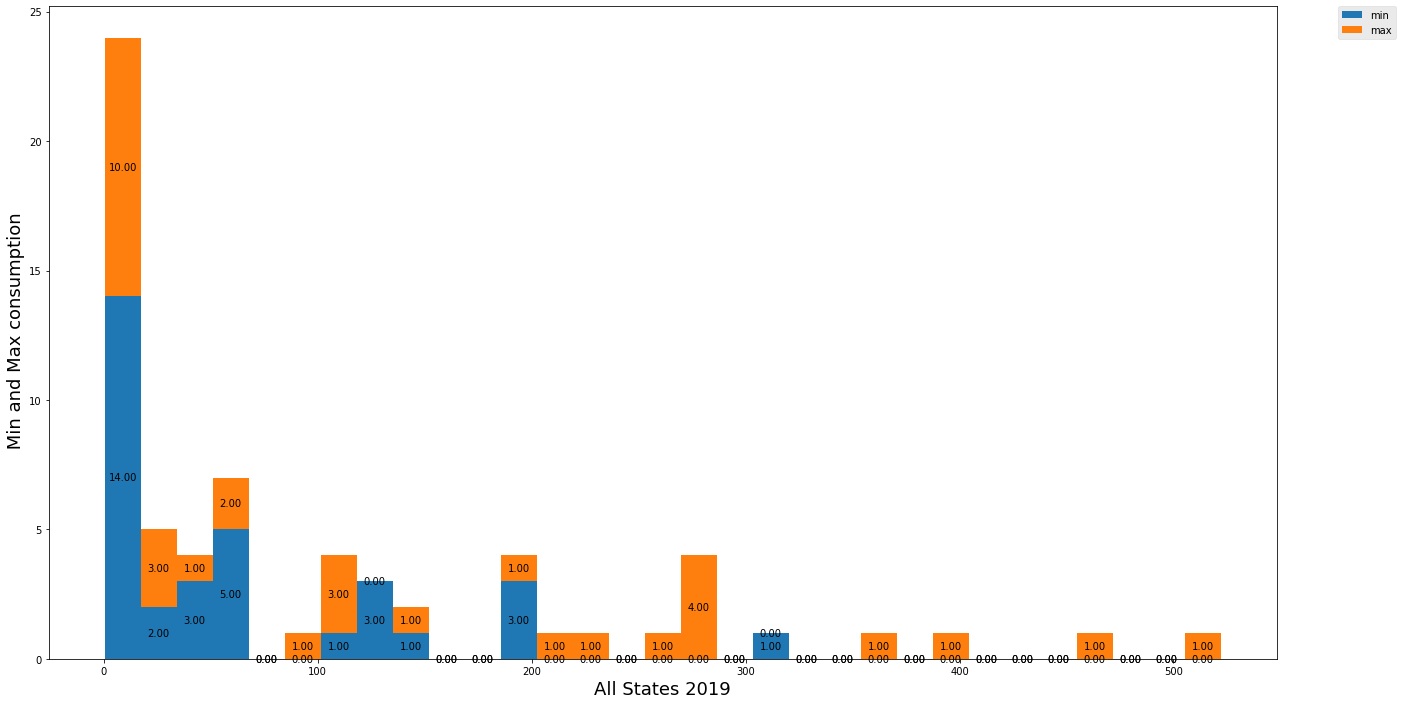

In [10]:
ax_hist = year_2019_des.plot.hist(stacked=True, figsize=(22,12), bins=31)
plt.style.use('ggplot')
# .patches is everything inside of the chart
for rect in ax_hist.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax_hist.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax_hist.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax_hist.set_ylabel(" Min and Max consumption", fontsize=18)
ax_hist.set_xlabel("All States 2019", fontsize=18)
plt.show()

In [11]:
region_data = pd.read_csv("long_data_.csv")
data.head()
region = region_data[['States','Regions']]
region = region.drop_duplicates()


In [12]:
regionNR = region['States'][region['Regions'] == 'NR'].tolist()
regionSR = region['States'][region['Regions'] == 'SR'].tolist()
regionWR = region['States'][region['Regions'] == 'WR'].tolist()
regionER = region['States'][region['Regions'] == 'ER'].tolist()
regionNER = region['States'][region['Regions'] == 'NER'].tolist()

In [13]:
regionNR_data = data[regionNR]
regionSR_data = data[regionSR]
regionWR_data = data[regionWR]
regionER_data = data[regionER]
regionNER_data = data[regionNER]

In [14]:
regionNR_year_2019  = year_2019 [regionNR]
regionSR_year_2019  = year_2019 [regionSR]
regionWR_year_2019  = year_2019 [regionWR]
regionER_year_2019  = year_2019 [regionER]
regionNER_year_2019  = year_2019 [regionNER]

In [15]:
regionNR_year_2020  = year_2020 [regionNR]
regionSR_year_2020  = year_2020 [regionSR]
regionWR_year_2020  = year_2020 [regionWR]
regionER_year_2020  = year_2020 [regionER]
regionNER_year_2020  = year_2020 [regionNER]

# Regional Consumption yearly

# 2019

In [16]:
Regional_consumption_2019= year_2019.transpose()
Regional_consumption_2019['Total consumption 2019'] = Regional_consumption_2019.sum(axis=1)
Regional_consumption_2019= Regional_consumption_2019.reset_index()
Regional_consumption_2019= Regional_consumption_2019.rename(columns={'index':'States'})
Regional_consumption_2019= pd.merge(Regional_consumption_2019,region,on='States')
Regional_consumption_2019= Regional_consumption_2019[['Regions','Total consumption 2019']]
Regional_consumption_2019= pd.DataFrame(Regional_consumption_2019.groupby('Regions')['Total consumption 2019'].sum())
Regional_consumption_2019.sort_values('Total consumption 2019',ascending=False) 

,Total consumption 2019
Regions,
WR,385280.5
NR,358694.8
SR,338795.2
ER,117915.1
NER,15519.7


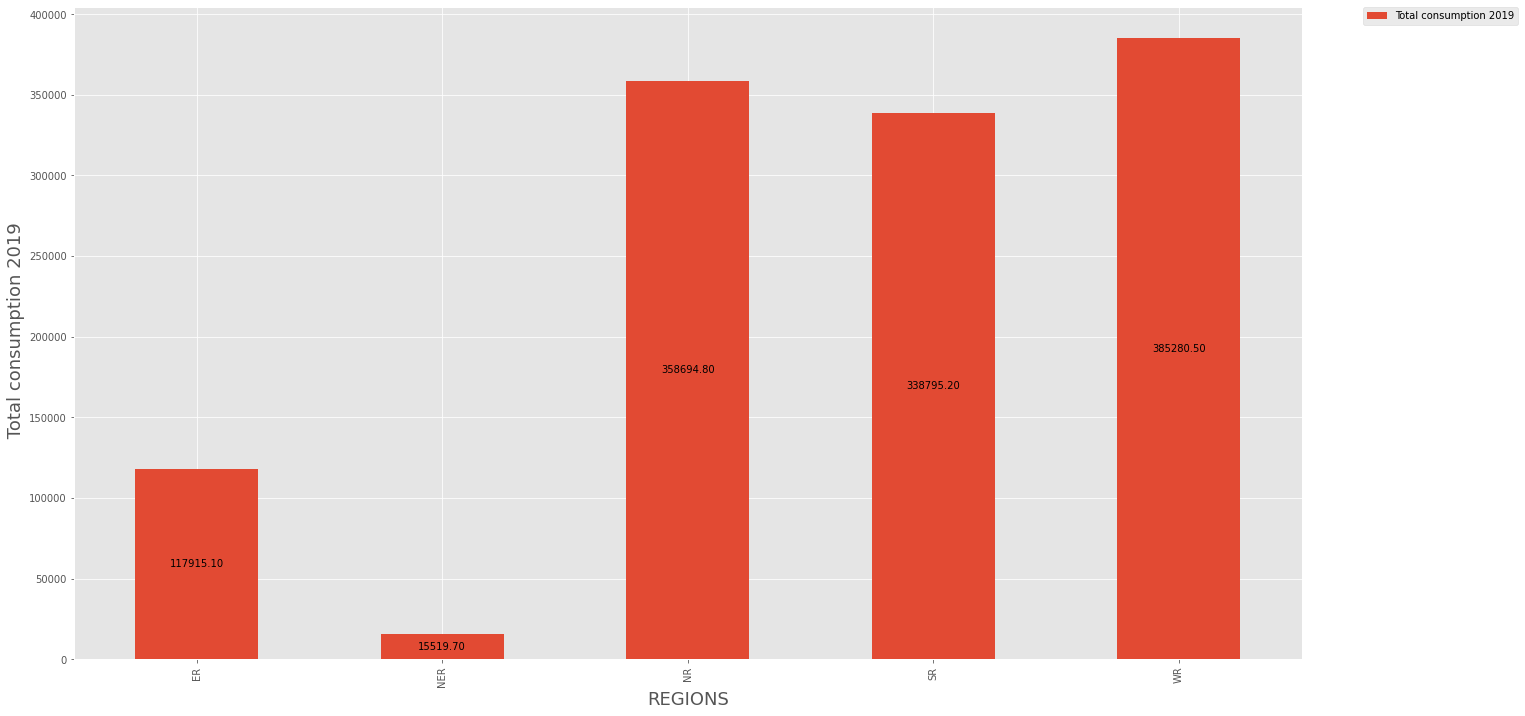

In [17]:
ax = Regional_consumption_2019.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Total consumption 2019", fontsize=18)
ax.set_xlabel("REGIONS", fontsize=18)
plt.show()

# 2020

In [18]:
Regional_consumption_2020 = year_2020.transpose()
Regional_consumption_2020['Total consumption 2020'] = Regional_consumption_2020.sum(axis=1)
Regional_consumption_2020 = Regional_consumption_2020.reset_index()
Regional_consumption_2020 = Regional_consumption_2020.rename(columns={'index':'States'})
Regional_consumption_2020 = pd.merge(Regional_consumption_2020,region,on='States')
Regional_consumption_2020 = Regional_consumption_2020[['Regions','Total consumption 2020']]
Regional_consumption_2020 = pd.DataFrame(Regional_consumption_2020.groupby('Regions')['Total consumption 2020'].sum())
Regional_consumption_2020.sort_values('Total consumption 2020',ascending=False) 

,Total consumption 2020
Regions,
WR,155089.3
NR,147559.8
SR,137883.4
ER,46799.4
NER,6190.7


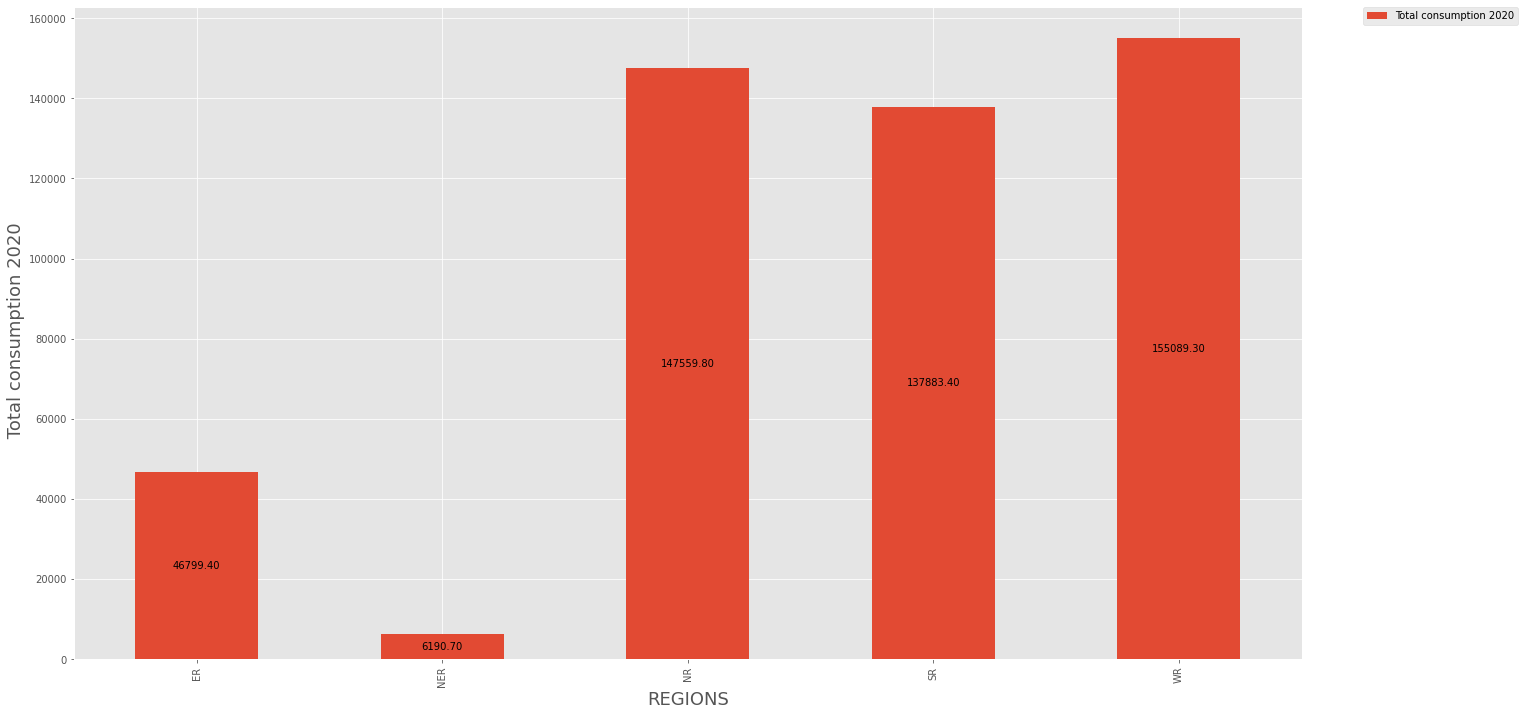

In [19]:
ax = Regional_consumption_2020.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Total consumption 2020", fontsize=18)
ax.set_xlabel("REGIONS", fontsize=18)
plt.show()

# State Consumption by region

# 2019

# NORTH

In [20]:
regionNR_year_2019 = pd.DataFrame([ regionNR_year_2019.sum(axis=0)]).transpose() 
regionNR_year_2019 = regionNR_year_2019.rename(columns={0:'Total consumption'}).sort_values('Total consumption',ascending=False)
regionNR_year_2019

,Total consumption
UP,112689.9
Rajasthan,78138.8
Punjab,49635.7
Haryana,48995.0
Delhi,29458.3
J&K,15915.3
Uttarakhand,12898.6
HP,9490.8
Chandigarh,1472.4


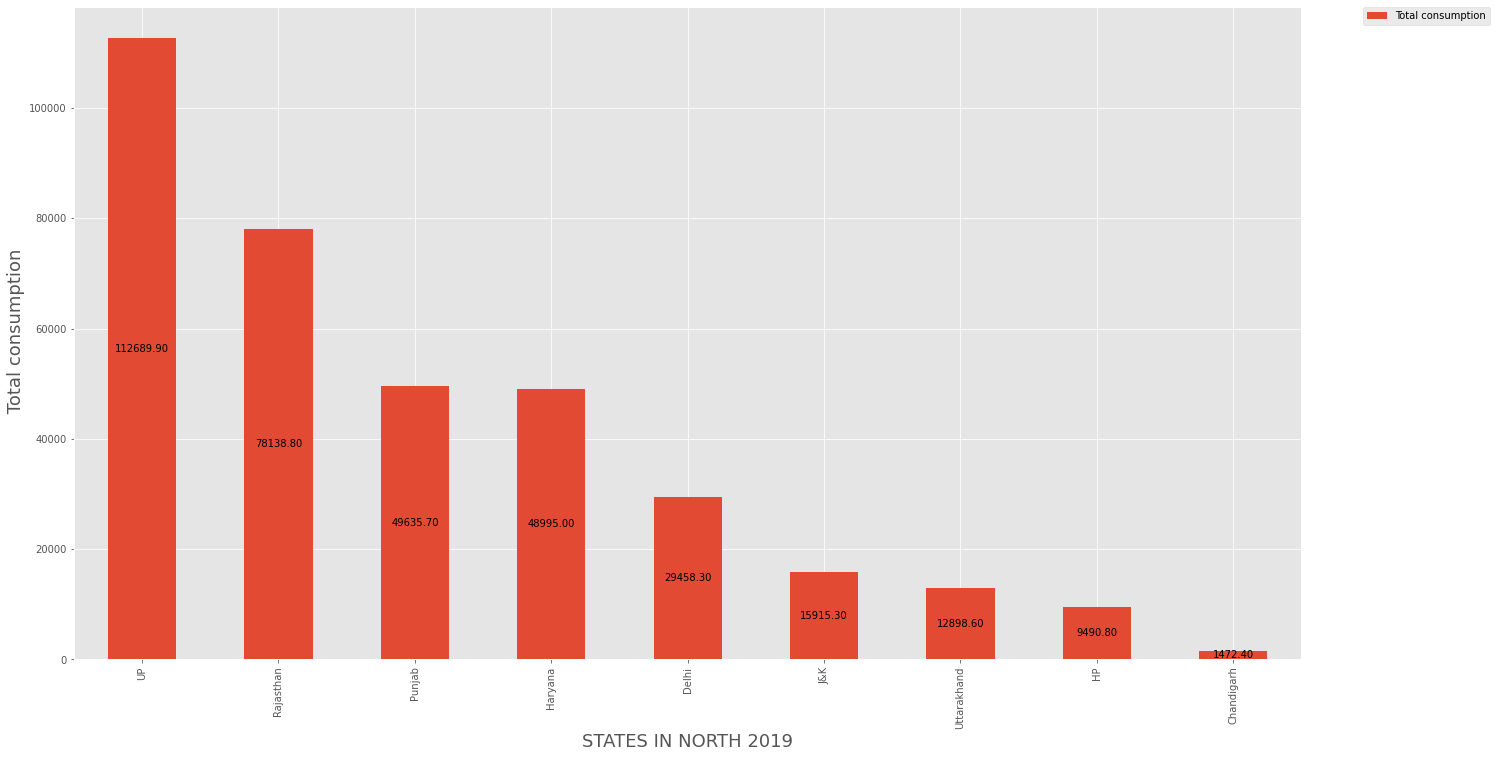

In [21]:
ax = regionNR_year_2019.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Total consumption", fontsize=18)
ax.set_xlabel("STATES IN NORTH 2019", fontsize=18)
plt.show()

# WEST

In [22]:
regionWR_year_2019 = pd.DataFrame([ regionWR_year_2019.sum(axis=0)]).transpose() 
regionWR_year_2019 = regionWR_year_2019.rename(columns={0:'Total consumption'}).sort_values('Total consumption',ascending=False)
regionWR_year_2019

,Total consumption
Maharashtra,154916.7
Gujarat,115357.4
MP,74974.6
Chhattisgarh,30179.9
DNH,5845.4
Goa,4006.5


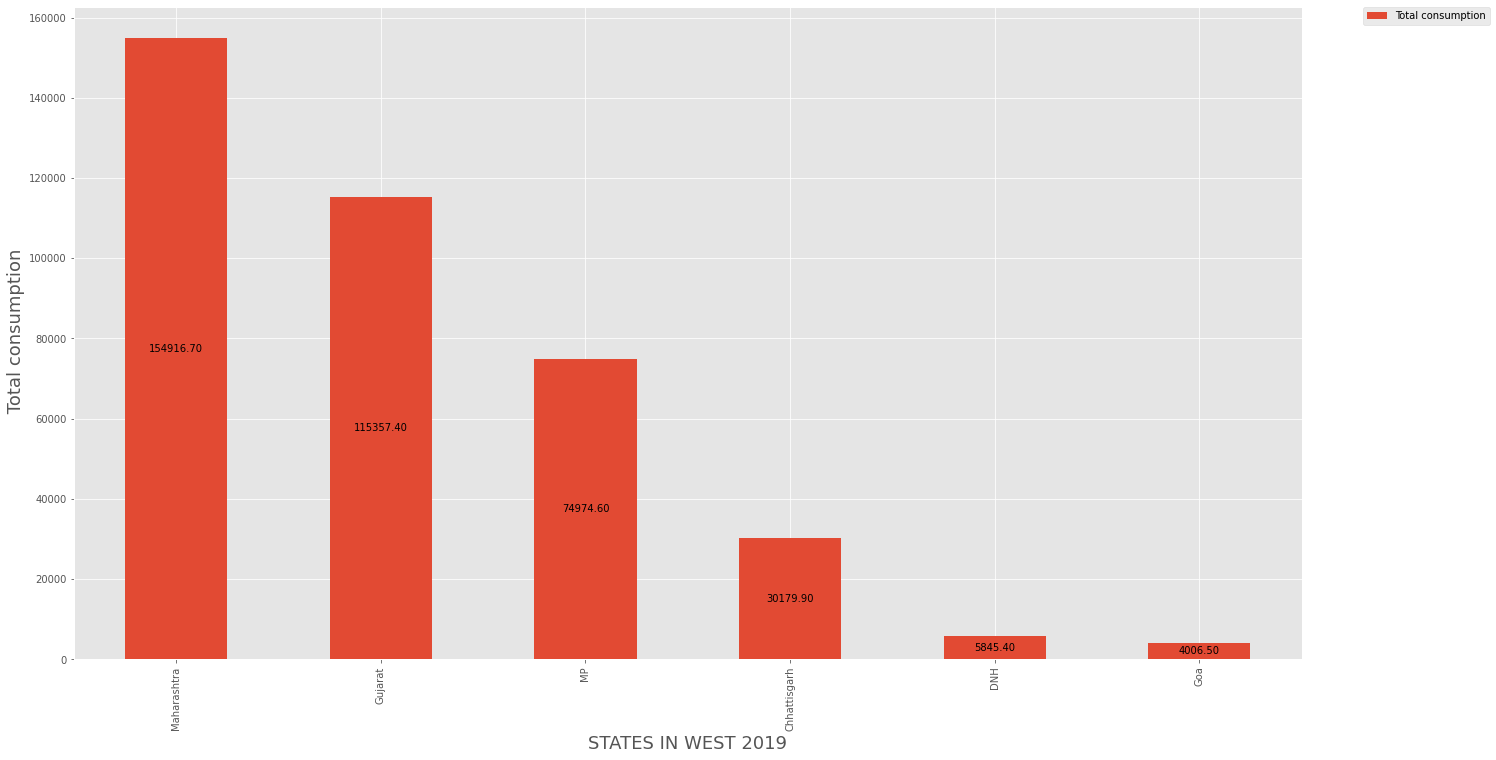

In [23]:
ax = regionWR_year_2019.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Total consumption", fontsize=18)
ax.set_xlabel("STATES IN WEST 2019", fontsize=18)
plt.show()

# WEST

In [24]:
regionSR_year_2019 = pd.DataFrame([ regionSR_year_2019.sum(axis=0)]).transpose() 
regionSR_year_2019 = regionSR_year_2019.rename(columns={0:'Total consumption'}).sort_values('Total consumption',ascending=False)
regionSR_year_2019

,Total consumption
Tamil Nadu,106720.2
Karnataka,73076.9
Telangana,67449.6
Andhra Pradesh,63097.0
Kerala,25798.2
Pondy,2653.3


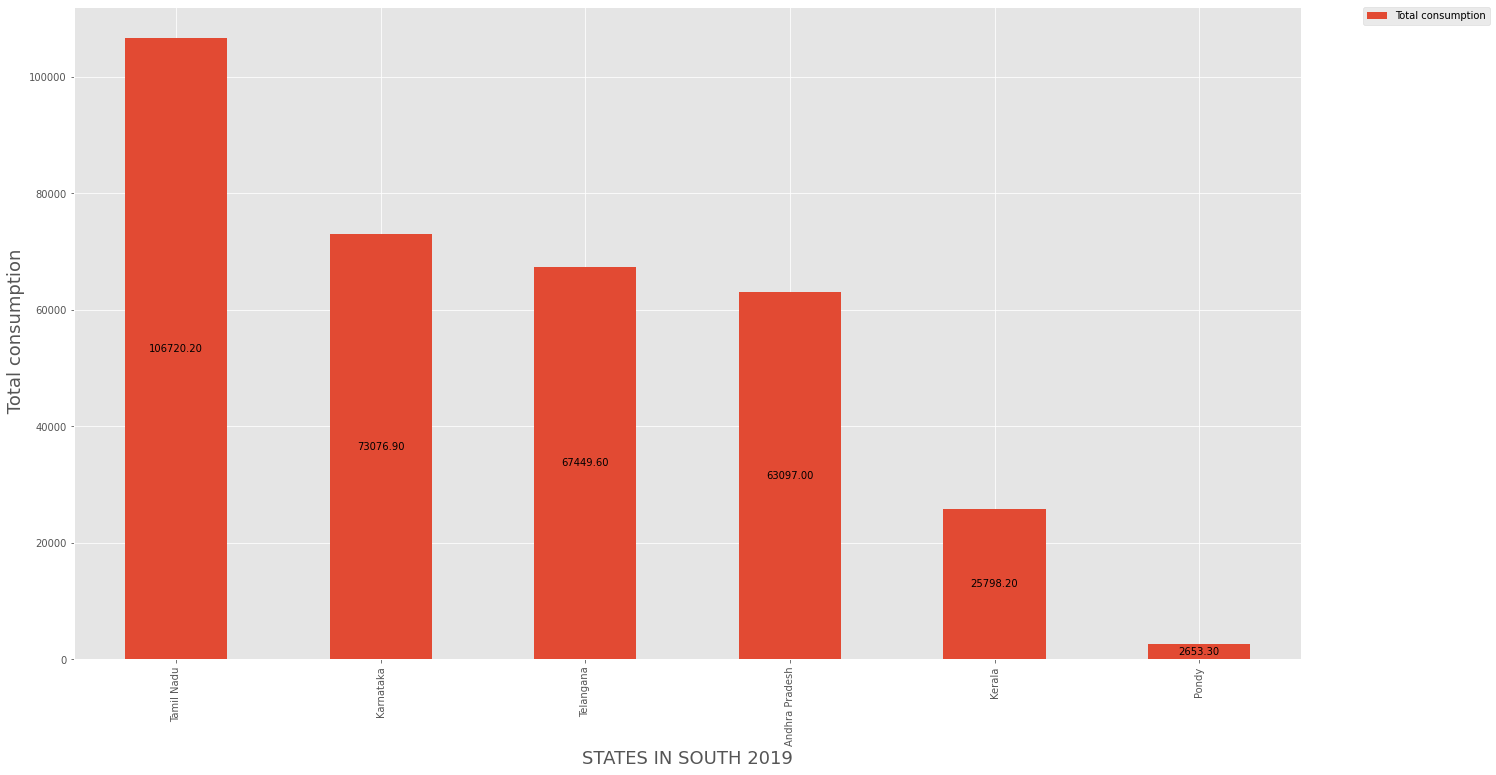

In [25]:
ax = regionSR_year_2019.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Total consumption", fontsize=18)
ax.set_xlabel("STATES IN SOUTH 2019", fontsize=18)
plt.show()

# EAST

In [26]:
regionER_year_2019 = pd.DataFrame([ regionER_year_2019.sum(axis=0)]).transpose() 
regionER_year_2019 = regionER_year_2019.rename(columns={0:'Total consumption'}).sort_values('Total consumption',ascending=False)
regionER_year_2019

,Total consumption
West Bengal,49868.7
Bihar,30007.9
Odisha,28966.6
Jharkhand,8605.5
Sikkim,466.4


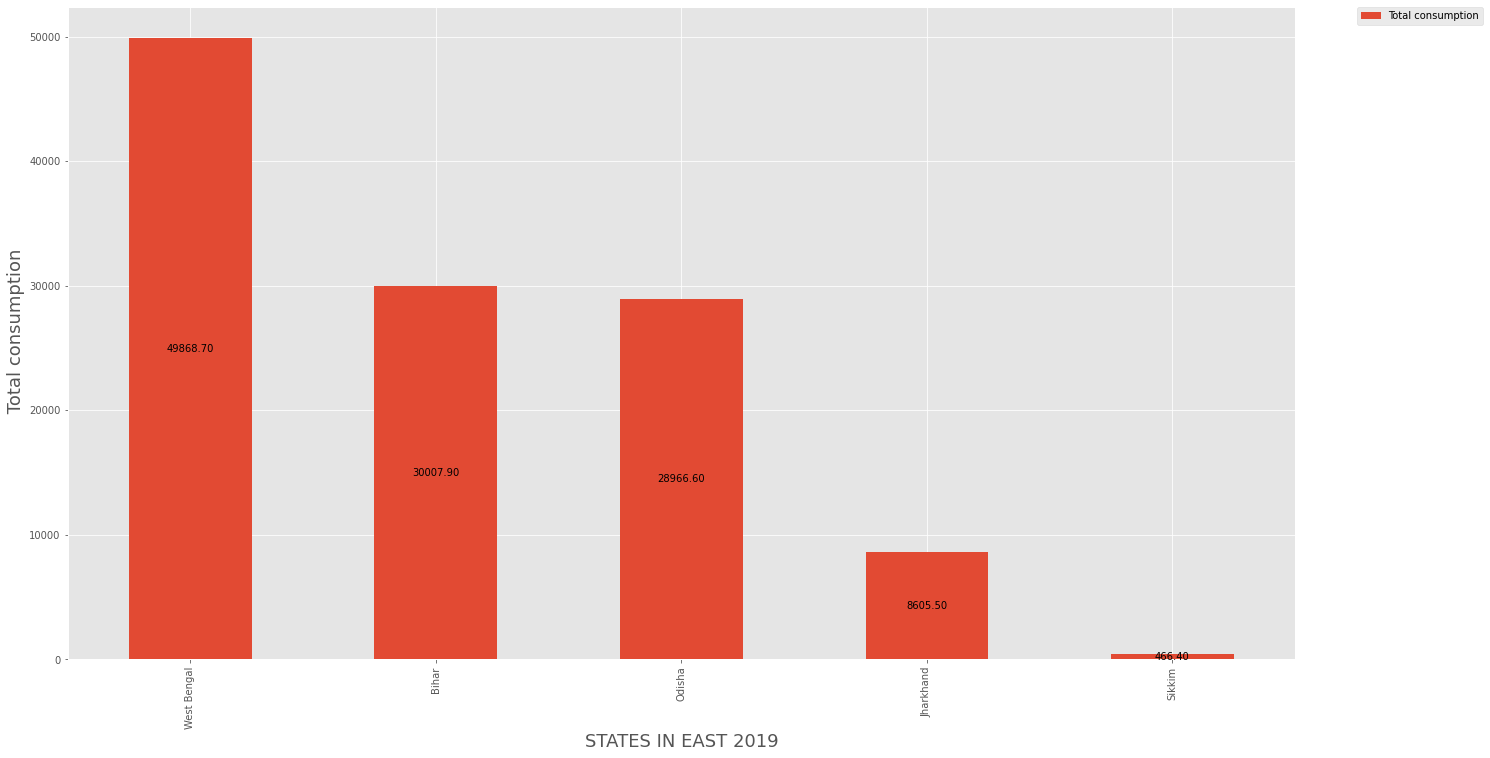

In [27]:
ax = regionER_year_2019.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Total consumption", fontsize=18)
ax.set_xlabel("STATES IN EAST 2019", fontsize=18)
plt.show()

# NORTH EAST

In [28]:
regionNER_year_2019 = pd.DataFrame([ regionNER_year_2019.sum(axis=0)]).transpose() 
regionNER_year_2019 = regionNER_year_2019.rename(columns={0:'Total consumption'}).sort_values('Total consumption',ascending=False)
regionNER_year_2019

,Total consumption
Assam,8979.4
Meghalaya,2018.1
Tripura,1482.5
Manipur,894.6
Nagaland,776.8
Arunachal Pradesh,754.0
Mizoram,614.3


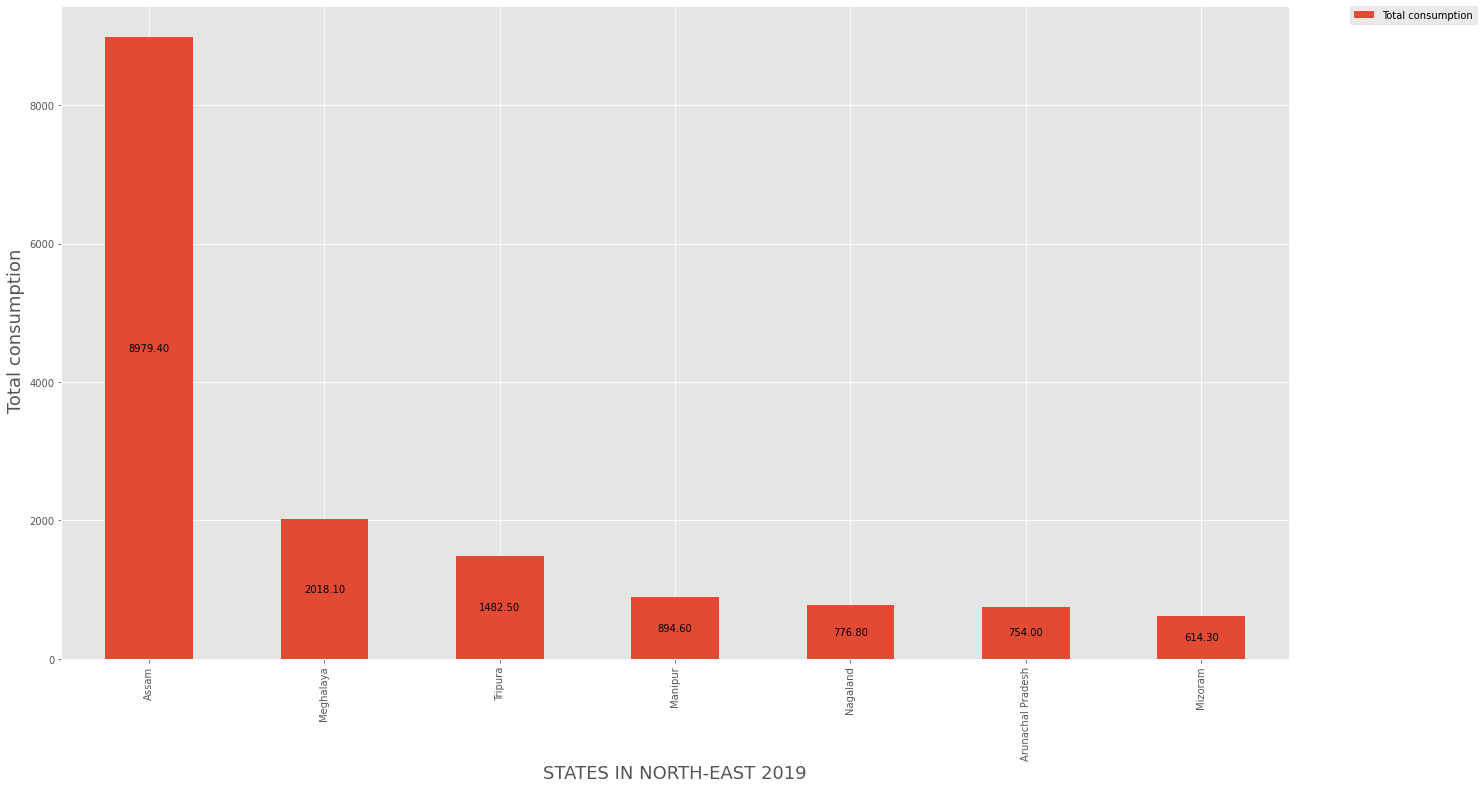

In [29]:
ax = regionNER_year_2019.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Total consumption", fontsize=18)
ax.set_xlabel("STATES IN NORTH-EAST 2019", fontsize=18)
plt.show()

# 2020

# NORTH

In [30]:
regionNR_year_2020 = pd.DataFrame([ regionNR_year_2020.sum(axis=0)]).transpose() 
regionNR_year_2020 = regionNR_year_2020.rename(columns={0:'Total consumption'}).sort_values('Total consumption',ascending=False)
regionNR_year_2020

,Total consumption
UP,45270.4
Rajasthan,31738.2
Punjab,21360.5
Haryana,20586.8
Delhi,12482.2
J&K,6349.5
Uttarakhand,5288.4
HP,3873.0
Chandigarh,610.8


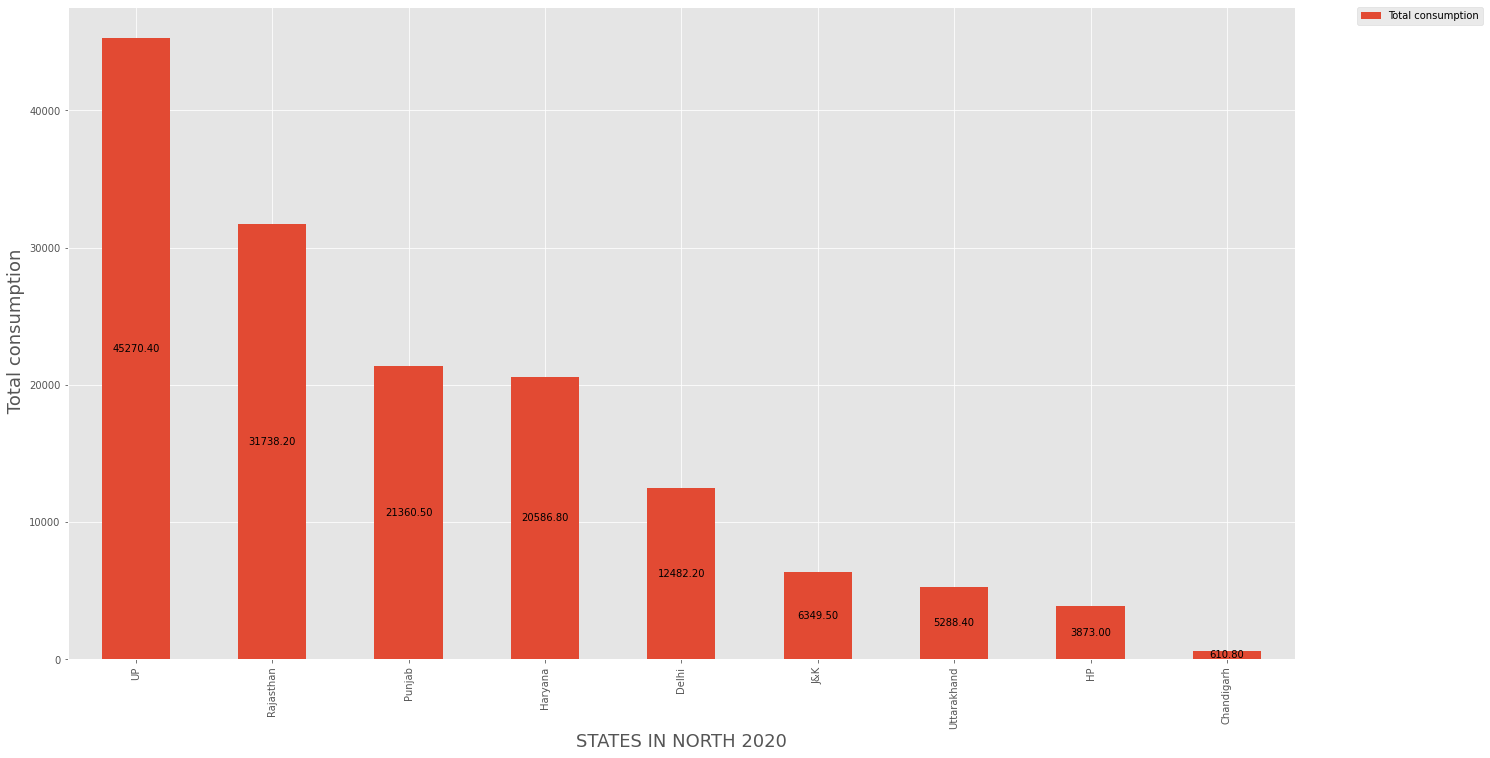

In [31]:
ax = regionNR_year_2020.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Total consumption", fontsize=18)
ax.set_xlabel("STATES IN NORTH 2020", fontsize=18)
plt.show()

# WEST

In [32]:
regionWR_year_2020 = pd.DataFrame([ regionWR_year_2020.sum(axis=0)]).transpose() 
regionWR_year_2020 = regionWR_year_2020.rename(columns={0:'Total consumption'}).sort_values('Total consumption',ascending=False)
regionWR_year_2020

,Total consumption
Maharashtra,62163.1
Gujarat,47131.5
MP,29791.8
Chhattisgarh,12010.3
DNH,2419.2
Goa,1573.4


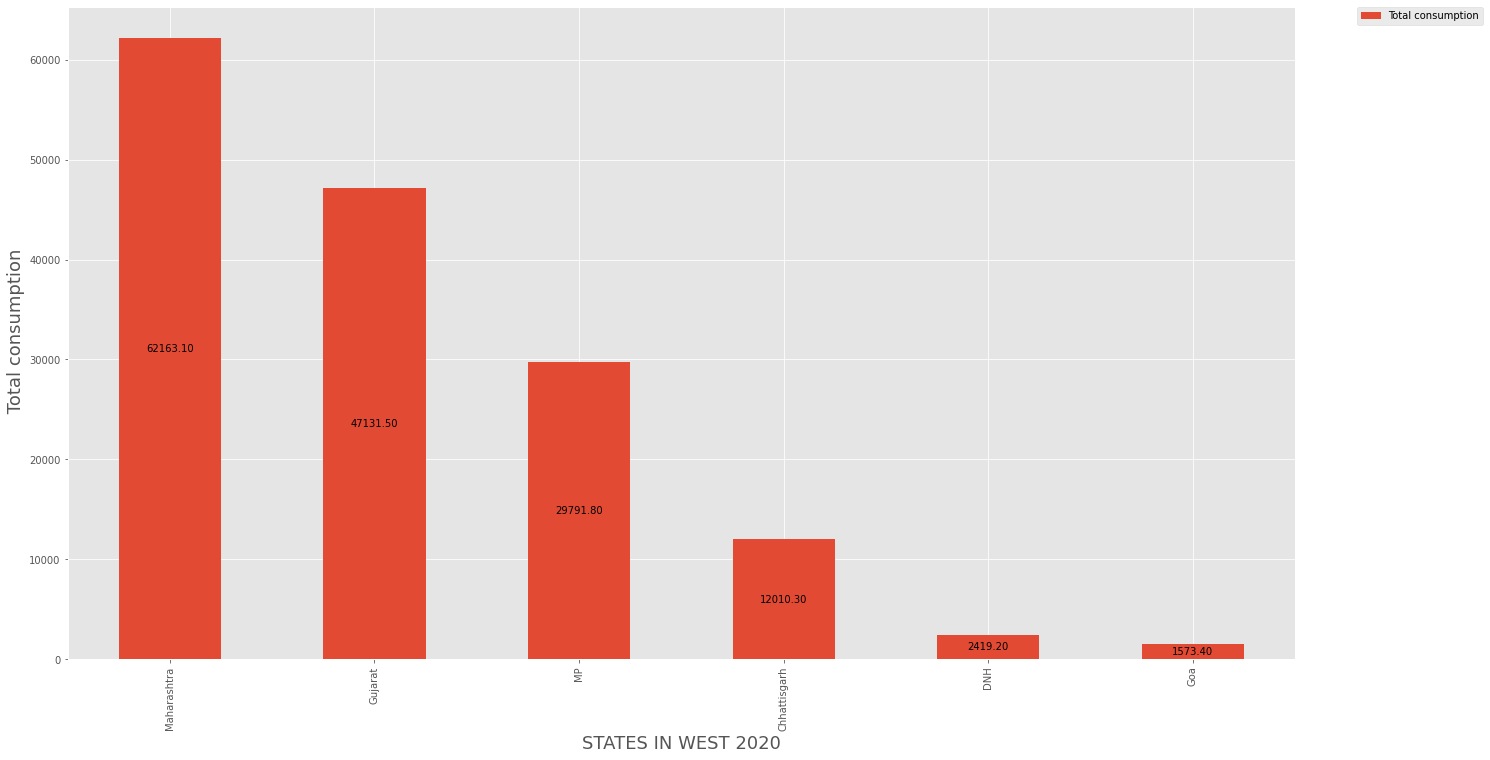

In [33]:
ax = regionWR_year_2020.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Total consumption", fontsize=18)
ax.set_xlabel("STATES IN WEST 2020", fontsize=18)
plt.show()

# SOUTH

In [34]:
regionSR_year_2020 = pd.DataFrame([ regionSR_year_2020.sum(axis=0)]).transpose() 
regionSR_year_2020 = regionSR_year_2020.rename(columns={0:'Total consumption'}).sort_values('Total consumption',ascending=False)
regionSR_year_2020

,Total consumption
Tamil Nadu,44551.3
Karnataka,29588.8
Telangana,26615.7
Andhra Pradesh,25507.4
Kerala,10514.6
Pondy,1105.6


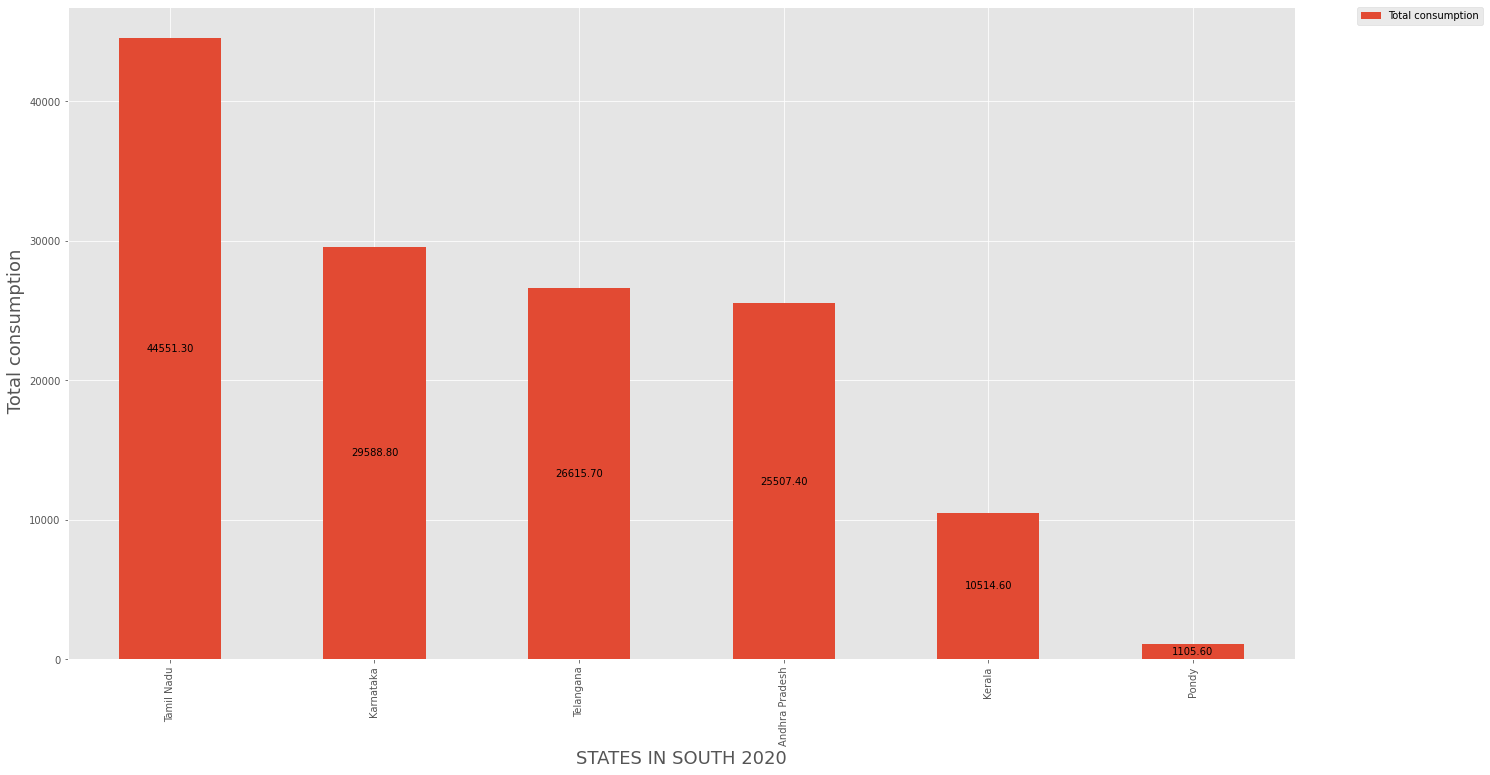

In [35]:
ax = regionSR_year_2020.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Total consumption", fontsize=18)
ax.set_xlabel("STATES IN SOUTH 2020", fontsize=18)
plt.show()

# EAST

In [36]:
regionER_year_2020 = pd.DataFrame([ regionER_year_2020.sum(axis=0)]).transpose() 
regionER_year_2020 = regionER_year_2020.rename(columns={0:'Total consumption'}).sort_values('Total consumption',ascending=False)
regionER_year_2020

,Total consumption
West Bengal,19901.5
Bihar,11821.3
Odisha,11507.1
Jharkhand,3387.3
Sikkim,182.2


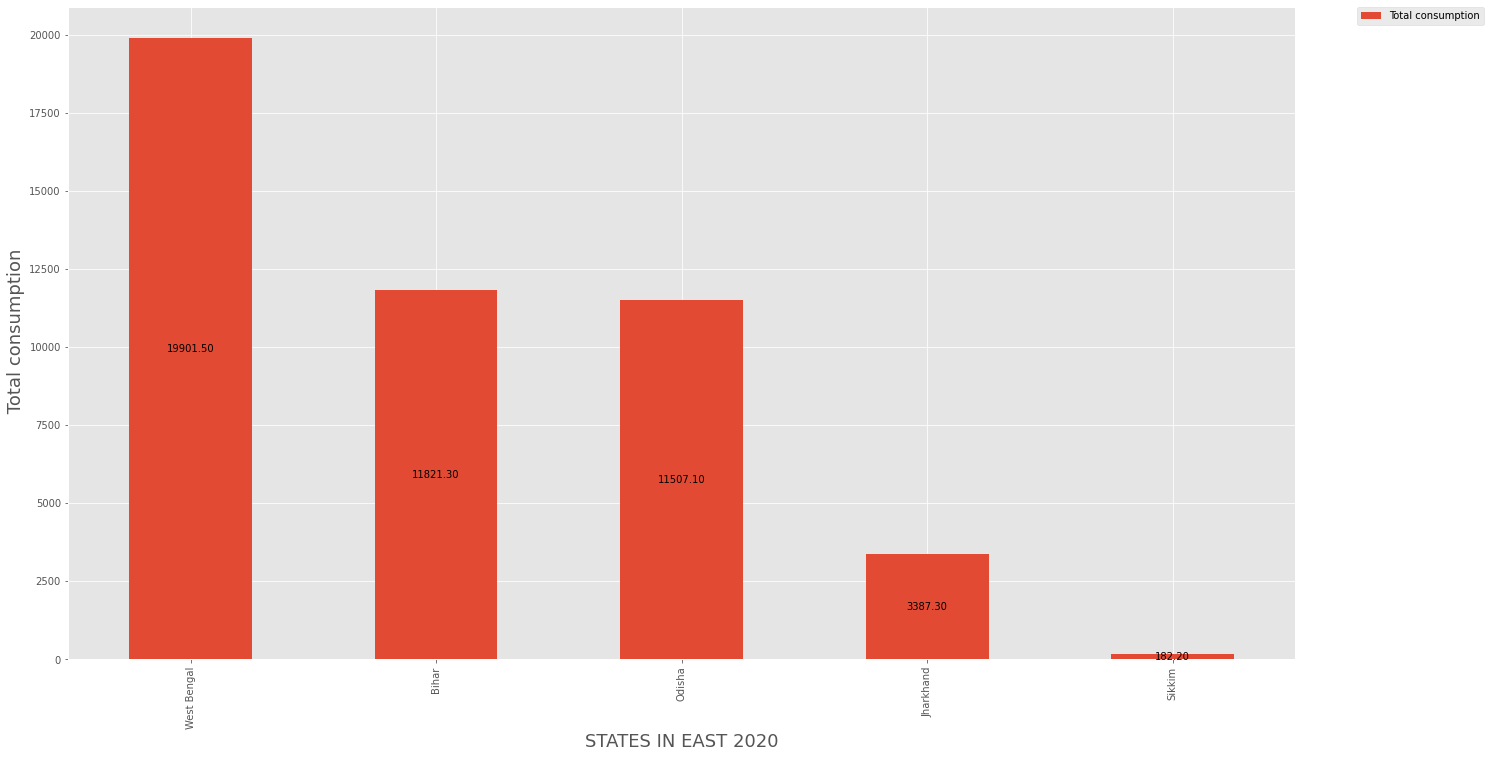

In [37]:
ax = regionER_year_2020.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Total consumption", fontsize=18)
ax.set_xlabel("STATES IN EAST 2020", fontsize=18)
plt.show()

# NORTH EAST

In [38]:
regionNER_year_2020 = pd.DataFrame([ regionNER_year_2020.sum(axis=0)]).transpose() 
regionNER_year_2020 = regionNER_year_2020.rename(columns={0:'Total consumption'}).sort_values('Total consumption',ascending=False)
regionNER_year_2020

,Total consumption
Assam,3575.5
Meghalaya,820.7
Tripura,572.5
Manipur,360.2
Nagaland,310.9
Arunachal Pradesh,306.9
Mizoram,244.0


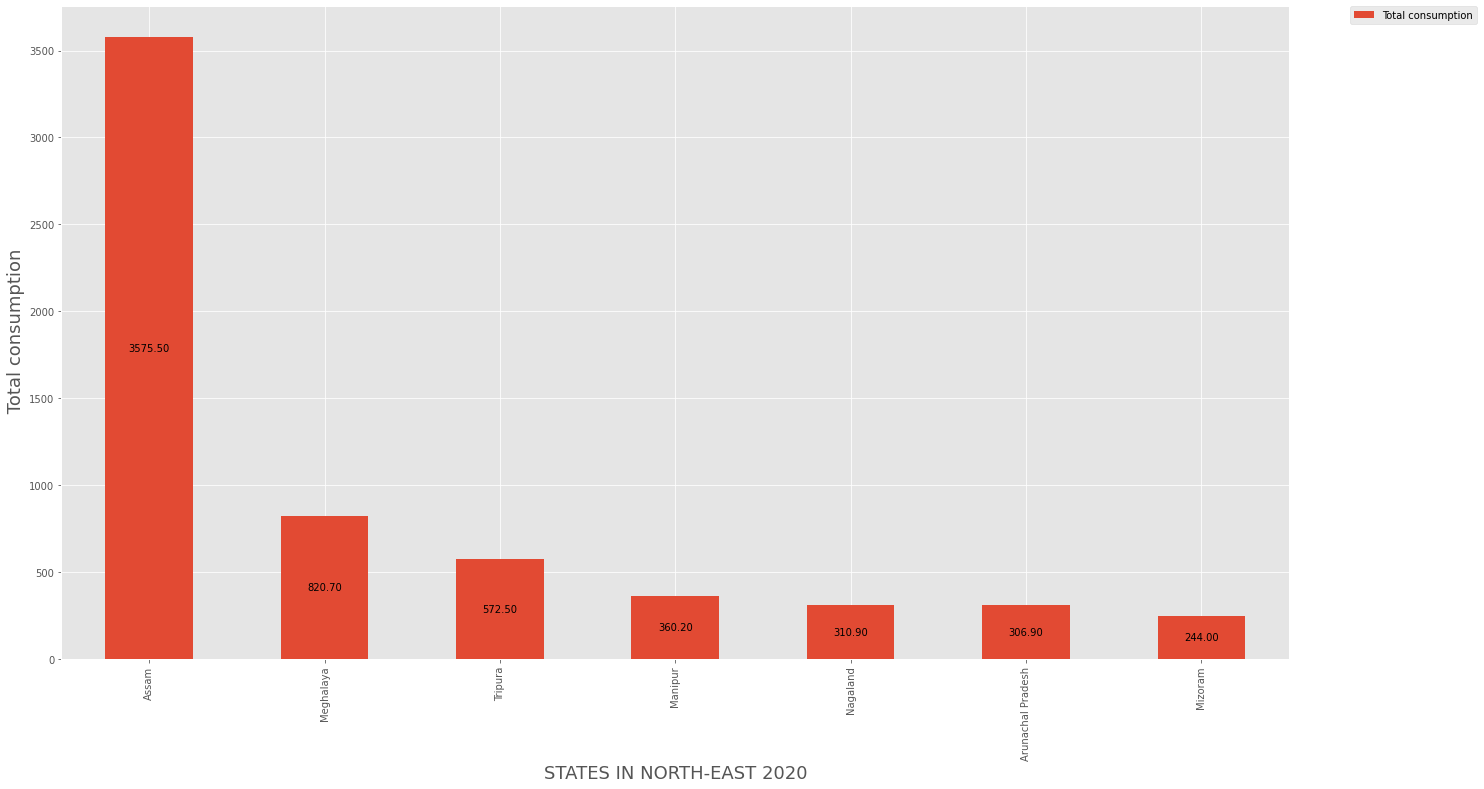

In [39]:
ax = regionNER_year_2020.plot.bar(stacked=False, figsize=(22,12))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{width:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

# move the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# add labels
ax.set_ylabel(" Total consumption", fontsize=18)
ax.set_xlabel("STATES IN NORTH-EAST 2020", fontsize=18)
plt.show()

# Top 10 States with maximum and least power Consumption yearly

In [40]:
year_2019 = year_2019.transpose()
year_2019['Total consumption'] = year_2019.sum(axis=1)
year_2019 = year_2019.reset_index()
year_2019 = year_2019.rename(columns={'index':'States'})
top_10_year_2019 = year_2019[['States','Total consumption']].sort_values('Total consumption',ascending=False)[:10].set_index('States')
top_10_year_2019

DATE,Total consumption
States,
Maharashtra,154916.7
Gujarat,115357.4
UP,112689.9
Tamil Nadu,106720.2
Rajasthan,78138.8
MP,74974.6
Karnataka,73076.9
Telangana,67449.6
Andhra Pradesh,63097.0


In [41]:
least_10_year_2019 = year_2019[['States','Total consumption']].sort_values('Total consumption',ascending=True)[:10].set_index('States')
least_10_year_2019

DATE,Total consumption
States,
Sikkim,466.4
Mizoram,614.3
Arunachal Pradesh,754.0
Nagaland,776.8
Manipur,894.6
Chandigarh,1472.4
Tripura,1482.5
Meghalaya,2018.1
Pondy,2653.3


In [42]:
year_2020 = year_2020.transpose()
year_2020['Total consumption'] = year_2020.sum(axis=1)
year_2020 = year_2020.reset_index()
year_2020 = year_2020.rename(columns={'index':'States'})
top_10_year_2020 = year_2020[['States','Total consumption']].sort_values('Total consumption',ascending=False)[:10].set_index('States')
top_10_year_2020

DATE,Total consumption
States,
Maharashtra,62163.1
Gujarat,47131.5
UP,45270.4
Tamil Nadu,44551.3
Rajasthan,31738.2
MP,29791.8
Karnataka,29588.8
Telangana,26615.7
Andhra Pradesh,25507.4


In [43]:
least_10_year_2020 = year_2020[['States','Total consumption']].sort_values('Total consumption',ascending=True)[:10].set_index('States')
least_10_year_2020

DATE,Total consumption
States,
Sikkim,182.2
Mizoram,244.0
Arunachal Pradesh,306.9
Nagaland,310.9
Manipur,360.2
Tripura,572.5
Chandigarh,610.8
Meghalaya,820.7
Pondy,1105.6


# power consumption contrast between lockdown and without lockdown (ref: march-may for the respective years)

In [44]:
no_lockdown['Without_lockdown Total consumption'] = no_lockdown.sum(axis=1)
no_lockdown['MONTH'] = no_lockdown.index.strftime('%m')
no_lockdown = no_lockdown[['Without_lockdown Total consumption','MONTH']]
no_lockdown = pd.DataFrame(no_lockdown.groupby('MONTH')['Without_lockdown Total consumption'].sum())
lockdown['lockdown Total consumption'] = lockdown.sum(axis=1)
lockdown['MONTH'] = lockdown.index.strftime('%m')
lockdown = lockdown[['lockdown Total consumption','MONTH']]
lockdown = pd.DataFrame(lockdown.groupby('MONTH')['lockdown Total consumption'].sum())
comparision = no_lockdown.join(lockdown['lockdown Total consumption'])
comparision['% Change']= 100 * (comparision['lockdown Total consumption'] - comparision['Without_lockdown Total consumption']  )/comparision['lockdown Total consumption'] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [45]:
comparision

,Without_lockdown Total consumption,lockdown Total consumption,% Change
MONTH,,,
03,100800.2,101115.7,0.312019
04,105784.6,103707.8,-2.002549
05,105696.8,77844.7,-35.779058


# graphs of daily and monthly consumptions at the respective years bringingout the periods of blackout in 2019

In [46]:
sorted_2019['Total consumption'] = sorted_2019.sum(axis=1)
sorted_2019 = sorted_2019[['Total consumption']]
sorted_2019 = sorted_2019.reset_index().drop_duplicates(subset = 'DATE').set_index('DATE')
sorted_2019

,Total consumption
DATE,
2019-01-07,3423.3
2019-01-08,3760.4
2019-01-09,3558.6
2019-01-10,3235.5
2019-01-11,2787.3
...,...
2019-12-27,3115.1
2019-12-28,3000.9
2019-12-29,3732.6


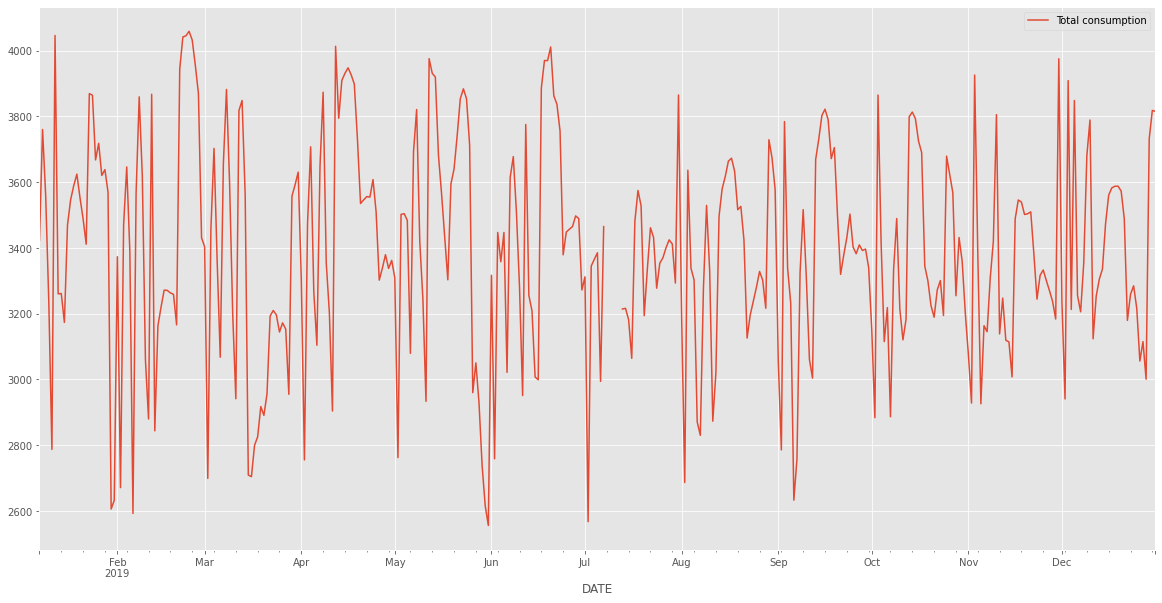

In [47]:
sorted_2019.asfreq('d').plot(figsize=(20,10))

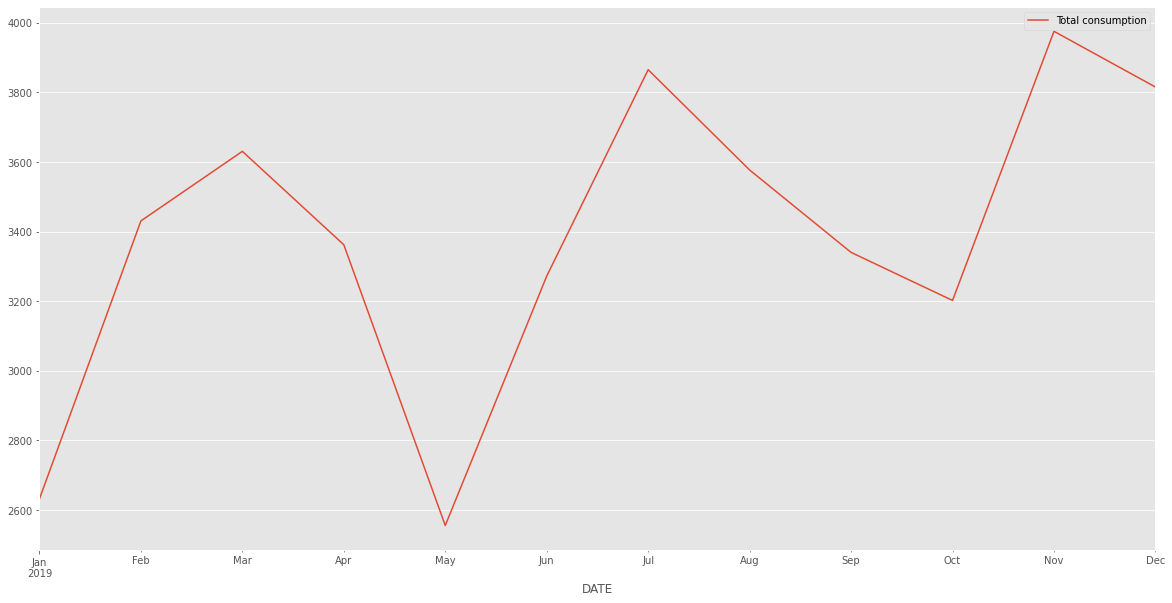

In [48]:
sorted_2019.asfreq('M').plot(figsize=(20,10))

# Blackout in 2019

In [49]:
black_out_2019 = sorted_2019[(sorted_2019.index >= '2019-07-5') & (sorted_2019.index <= '2019-07-15')]

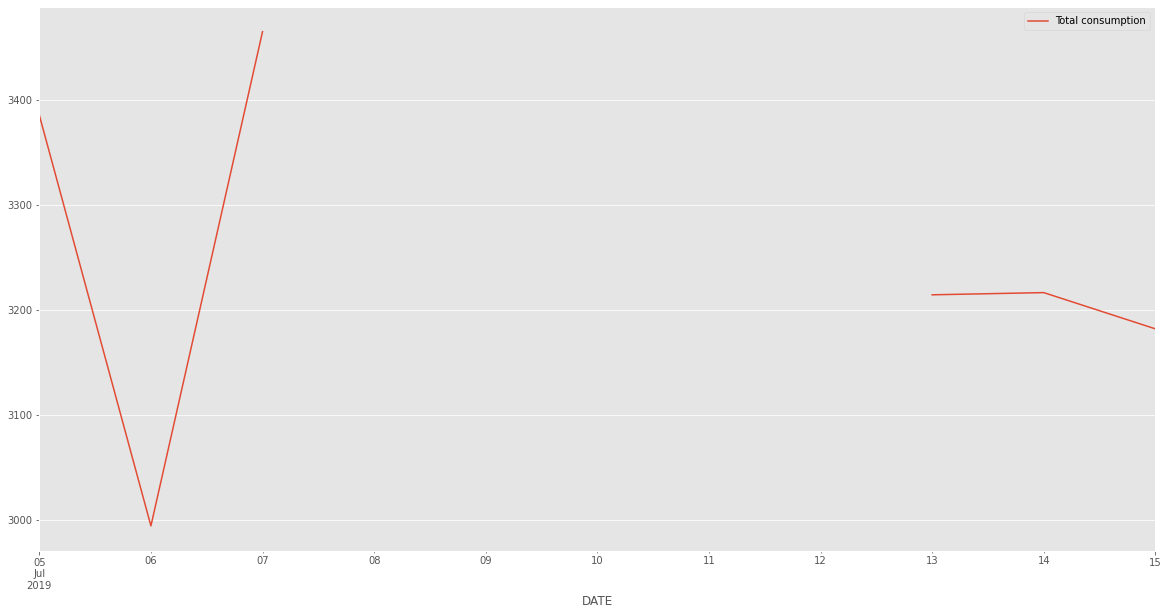

In [50]:
black_out_2019.asfreq('d').plot(figsize=(20,10))

In [51]:
sorted_2020['Total consumption'] = sorted_2020.sum(axis=1)
sorted_2020 = sorted_2020[['Total consumption']]
sorted_2020 = sorted_2020.reset_index().drop_duplicates(subset = 'DATE').set_index('DATE')
sorted_2020

,Total consumption
DATE,
2020-01-01,3734.9
2020-01-02,3607.5
2020-01-03,3322.7
2020-01-04,3026.4
2020-01-05,3923.2
...,...
2020-05-19,3532.7
2020-05-20,3554.5
2020-05-21,3555.1


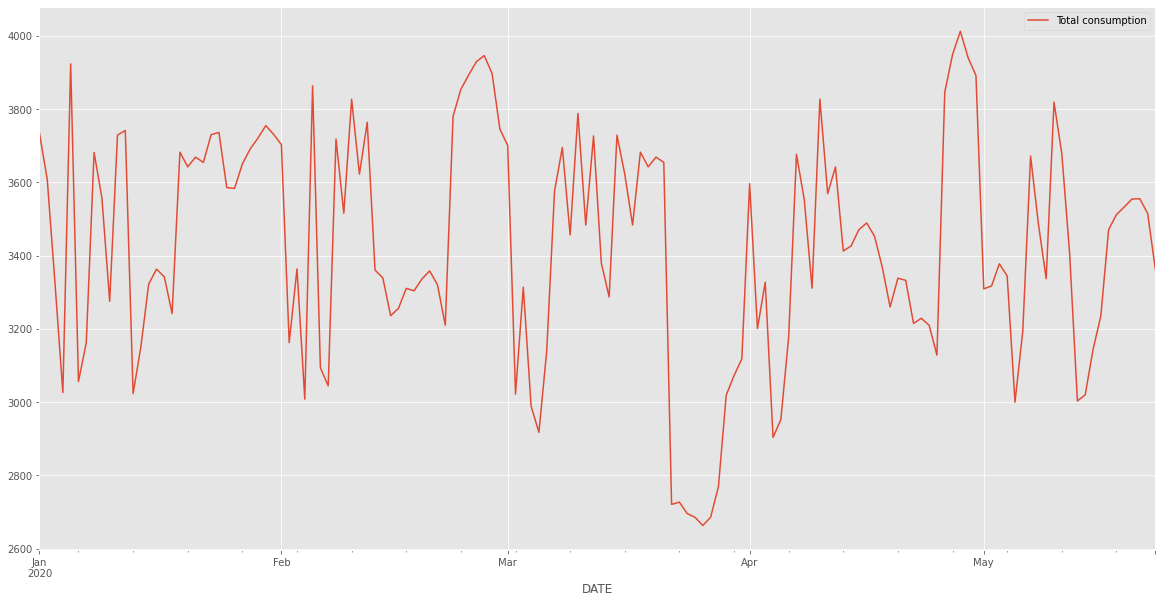

In [52]:
sorted_2020.asfreq('d').plot(figsize=(20,10))

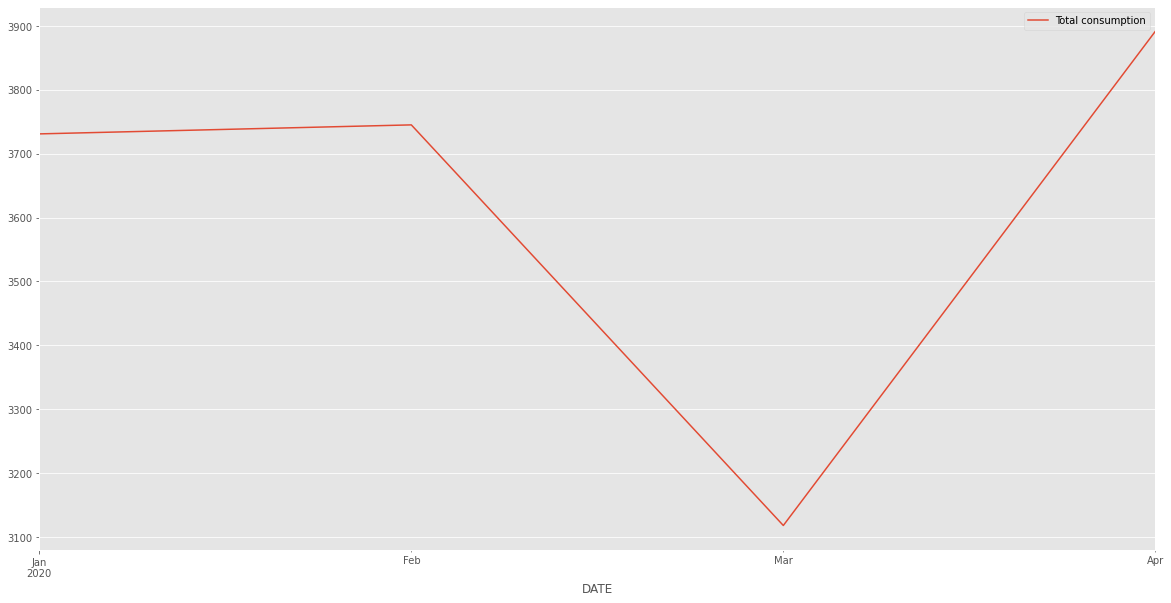

In [53]:
sorted_2020.asfreq('M').plot(figsize=(20,10))